In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

import seaborn as sns
from utils.colors import DTU_COLOR_HEX, DTU_BIN, DTU_BIN_HC
colors = list(DTU_COLOR_HEX.values())
sns.set_palette(sns.color_palette(colors))
CM_DTU_BIN = LinearSegmentedColormap.from_list('dtu_bin', DTU_BIN, N=2)
import pickle

from models.daypattern import DayPatternSim, ACTIVITIES
from models.prim import PrimClassifier, score, coverage, density
from models.sampler import Sampler
from utils.data_loader import load_metadata, load_betas

%matplotlib inline

In [2]:
ACTIVITY = 'LeisureT'
THRESHOLD = 7900
filename = '1683818388.570091'

betas_dp = load_betas('dp')
names = list(betas_dp.keys())[:-1]

df, betas, bounds = load_metadata()

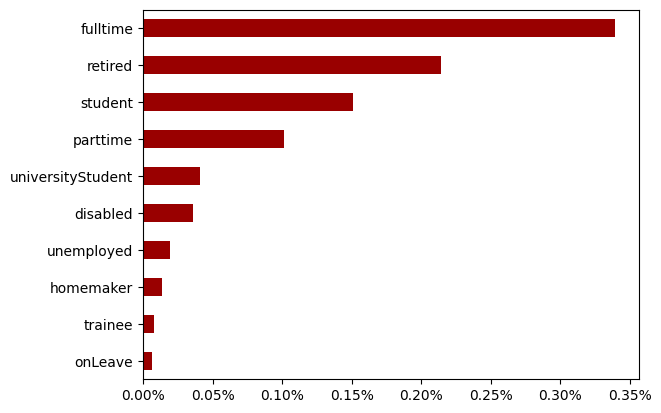

In [3]:
import matplotlib.ticker as mtick

position = ['fulltime','parttime','retired',	'disabled',	'onLeave',	'homemaker', 'unemployed', 'universityStudent',	'trainee', 'student']
values = (df[position].sum()/len(df)).sort_values()
ax = values.plot(kind='barh')
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
plt.show()

In [4]:
data = pd.read_csv(f'data/out/{filename}.csv')
data = data.drop(['Unnamed: 0'], axis=1)
data_standardized = (data - data.mean()) / data.std()
cube = data[names]
counts = data[ACTIVITY]

In [5]:
counts = data[ACTIVITIES]
corr = counts.corr()

In [6]:
corr.round(2)

WorkT  EduT  PersonalT  ShopT  LeisureT  EscortT
WorkT       1.00  0.12      -0.13  -0.01      0.10     0.11
EduT        0.12  1.00      -0.02  -0.01      0.09     0.01
PersonalT  -0.13 -0.02       1.00   0.05      0.08    -0.01
ShopT      -0.01 -0.01       0.05   1.00      0.08     0.11
LeisureT    0.10  0.09       0.08   0.08      1.00     0.04
EscortT     0.11  0.01      -0.01   0.11      0.04     1.00

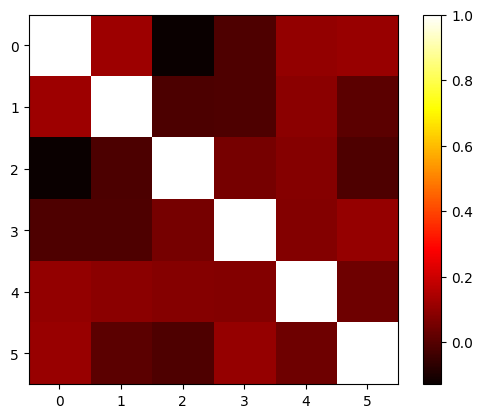

In [7]:
plt.imshow(corr, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [8]:
binaries = pd.read_csv('models/meta/binaries.csv')
binaries.columns

Index(['Unnamed: 0', 'onetour', 'twotour', 'threetour', 'fourtour', 'WorkT',
       'EduT', 'PersonalT', 'ShopT', 'LeisureT', 'EscortT', 'workedu_tt',
       'workpersonal_tt', 'workshop_tt', 'workleisure_tt', 'workescort_tt',
       'edupersonal_tt', 'edushop_tt', 'eduleisure_tt', 'eduescort_tt',
       'personalshop_tt', 'personalleisure_tt', 'personalescort_tt',
       'shopleisure_tt', 'shopescort_tt', 'leisureescort_tt'],
      dtype='object')

In [9]:
columns = [col for col in df.columns if 'age' in col]
values = df[columns].sum().values
labels = ['0-19', '20-25', '26-35', '36-50', '51-65', '>65']


/tmp/ipykernel_2250271/1202470086.py:2: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels=labels, loc='best')


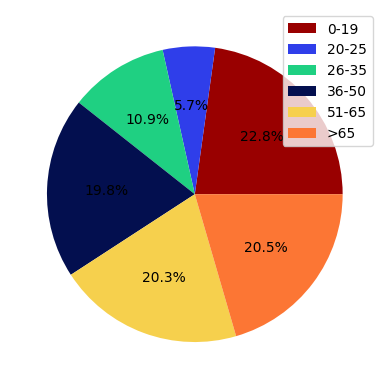

In [10]:
patches, text, _ = plt.pie(values, autopct='%.1f%%')
plt.legend(patches, labels=labels, loc='best')

In [11]:
pd.DataFrame(df.mean()).transpose()

SessionId  IncRespondent2000  missing_IND_Income  IND_INC_imputed  \
0  413658.942741         143.140545            0.340978       210.747586   

   FAM_INC_imputed  IncHouseh2000  missing_HH_Income  incFamily2000  \
0       493.194659     333.326444           0.422821      290.37288   

   missing_FAM_Income  ageUpto19  ...  av_56  av_57  av_58  av_59  av_60  \
0            0.422151   0.228006  ...    1.0    1.0    1.0    1.0    1.0   

   av_61  av_62  av_63   student  IncomeScaled  
0    1.0    1.0    1.0  0.151214      0.493195  

[1 rows x 102 columns]

In [12]:
cube = pd.DataFrame(cube.iloc[1]).transpose()

In [13]:
DP = DayPatternSim(betas, df)
DP.run(cube)

LIC_travel  OnLeave_travel  OtherStudent_travel  TRANS_travel  \
0    0.782354       -1.291241            -0.336213      0.459514   

   age2025_travel  age2635_travel  age5165_travel  age65_travel  \
0       -0.129196         0.10033        -0.36957     -0.427925   

   ageUpto19_travel  disabled_travel  ...  workpersonal_tt  workshop_tt  \
0         -0.416673        -1.367204  ...           -0.913       -0.298   

   cons_travel   WorkT    EduT  PersonalT   ShopT  LeisureT  EscortT  \
0         1.54  9272.0  3832.0     1457.0  5486.0    7987.0   1683.0   

   execution_time  
0        4.343996  

[1 rows x 142 columns]